### Logistic Regression을 사용해서 와인 데이터 분류
- 예측값이 0.5보다 작을 경우, 0.05보다 클 경우 1로 에측(이진 분류)

#### 와인데이터를 이용한 이진분류
- 데이터셋 구성
    - 레드와인: 1599개 / 화이트와인:4894개 / 총 6497개
    - 12개의 특성과 1개의 클래스로 구성

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
wine = pd.read_csv('wine.csv')
del wine["Unnamed: 0"] #불필요한 컬럼제거

In [13]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
x = wine.iloc[:,1:]
y = wine['type']

In [16]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(C=1, max_iter=1000).fit(x_train, y_train) #alpha값의 역수인 C(기본값은 1), 학습횟수

In [23]:
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

In [25]:
print('train score:', train_score)
print('test score:', test_score)
print('train - test score :', train_score - test_score)

train score: 0.9843853089949417
test score: 0.9887179487179487
train - test score : -0.004332639723007015


### 최적의 C값 찾기

In [26]:
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_acc = []
test_acc = []

In [27]:
for i in c_list:
    lr = LogisticRegression(C=i, max_iter=10000).fit(x_train, y_train)
    
    train_score = lr.score(x_train, y_train)
    test_score = lr.score(x_test, y_test)
    
    train_acc.append(train_score)
    test_acc.append(test_score)

In [29]:
print(train_acc)
print(test_acc)

[0.9375412359797669, 0.9467780954475479, 0.9703100945678469, 0.9843853089949417, 0.9859247855729052, 0.9872443369254453, 0.9879041126017154]
[0.9420512820512821, 0.9523076923076923, 0.9728205128205129, 0.9887179487179487, 0.9912820512820513, 0.9912820512820513, 0.9902564102564102]


In [30]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family="Malgun Gothic") #한글인코딩
plt.rcParams['axes.unicode_minus'] = False

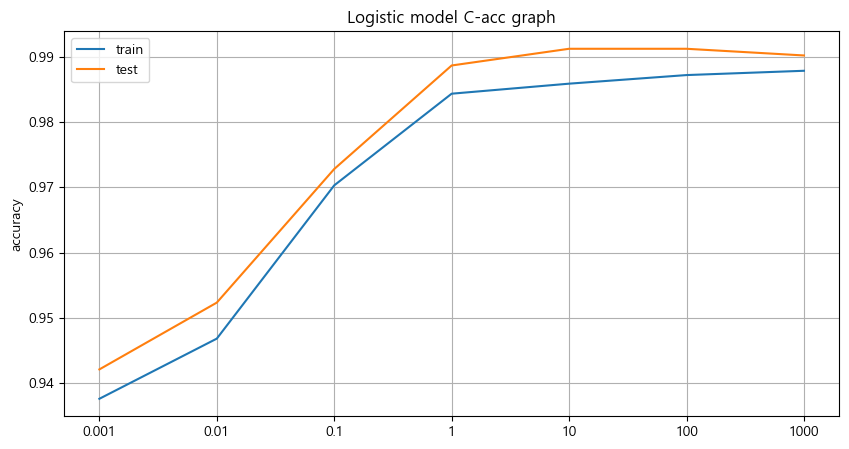

In [31]:
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.title('Logistic model C-acc graph')
plt.ylabel('accuracy')
plt.xticks(np.arange(7), c_list)
plt.legend()
plt.grid()
plt.show()

### GridSearch

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000]}

In [34]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [35]:
grid_search.fit(x_train, y_train)

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\envs\orange3-\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [36]:
print('최적 매개변수:', grid_search.best_params_)
print('최고 교차 검증 점수:', grid_search.best_score_) #전체 데이터셋을 쪼개서 검증

최적 매개변수: {'C': 1000}
최고 교차 검증 점수: 0.9795464161800795
